# Preprocessing


## Stop word removal: 

This means we exclude some terms, e.g. “the,” “a,” “is,” “at,” “which,” or “on” (so-called “stop words”). These are words that do not contribute a lot to a deeper understanding of the text in consideration as they do not have significant meaning. You can see programming examples of stop word removals in Section 15.4 starting on page 126 and in Section 19.5 starting on page 146.



## Stemming and lemmatization: 

Here you combine different grammatical forms of the same words, e.g. “travel,” “traveling,” and “traveled.” Again the basic idea is to remove noisy data (in this case the suffix) that are of limited use in understand- ing the text. The difference between stemming and lemmatization is that stem- ming often uses a crude heuristic process, while lemmatization tries to do things properly with the use of a vocabulary and morphological analysis of words. For ex- ample, when considering the token “saw,” stemming might just return “s” whereas lemmatization would attempt to return either “saw” or “see” depending on whether the token is used as a noun or verb. The following example in Python illustrates lemmatization (using the NLTK package; you could also use Pattern, which also has fancy lemmatization).



**Lower case** conversion means you convert all words to lowercase. This can be impor- tant, e.g. some words appear at the beginning of a sentence and are thus capitalized, but their content is the same as their lower case version.

 **Synonyms**: For example “begin” and “commence” have nearly the same meaning and therefore could be treated the same. You could thus replace all synonyms, e.g. you would replace “commence” and “start” by “begin.” For a given word (such as “begin” in the code below), you can find all its synonyms as follows:



In [3]:

from nltk.corpus import wordnet
syns = []
for s in wordnet.synsets('begin'):
    for lem in s.lemmas():
        syns.append(lem.name())
print(syns)
set(syns)

['Begin', 'Menachem_Begin', 'get_down', 'begin', 'get', 'start_out', 'start', 'set_about', 'set_out', 'commence', 'begin', 'start', 'begin', 'lead_off', 'start', 'commence', 'begin', 'begin', 'begin', 'begin', 'start', 'begin', 'start', 'begin', 'begin']


{'Begin',
 'Menachem_Begin',
 'begin',
 'commence',
 'get',
 'get_down',
 'lead_off',
 'set_about',
 'set_out',
 'start',
 'start_out'}

## Special words: 

For example “Microsoft Windows” has nothing to do with the com- mon use of the term “Windows.” Or “New York” should really be treated as a single term instead of the two separate words “New” and “York.” If you end up having a lot of these kinds of words in your specific application, you can use named entity recognition (NER) as discussed in Chapter 17 starting on page 135. Alternatively you might consider concatenating them e.g. to “MicrosoftWindows” and “NewYork” to make sure they are treated correctly. Of course, this involves some hand-coding and in many applications might after all not be necessary. But it might make an important difference in some specific applications.


In [5]:
s = 'New York and California'
s.replace('New York', 'NewYork')


'NewYork and California'

## Part of speech tagging 

(see the example code in Chapter 17 starting on page 135): 
Each sentence is analyzed and tags are appended to nouns, verbs, etc. For example the sentence “And now for something completely different” becomes:

  And/CC now/RB for/IN something/NN completely/RB different/JJ
CC is a coordinating conjunction, RB is an adverb, IN is a preposition, NN is a noun, and JJ is an adjective.

## Reduce the number of words in your text corpus.
– Discard all one- or two-letter words, e.g. “a” or “to.”

– Exclude numbers.

– For example, you could remove words that occur only in 0.5% or less of all doc- uments. (The threshold level of 0.5% is arbitrary and can be chosen differently depending on your application.) So if a word does not occur in at least 99.5% of all documents, you remove it from your text corpus. To decide whether to remove a given word, you would cycle through all documents, check whether the word occurs in each document, and then divide the number of documents it occurred in by the total number of documents. If this number is less than 0.995, you would remove that word.

– Alternatively you could for example only keep the 2000 most commonly-used words and discard the rest. The basic idea is that you can express yourself pretty well if you have a vocabulary of 2000 words (or even less), even though the English language for example has more than 100,000 words in total. Of course, whether you use 2000 as the cutoff depends on your specific application and you might want to use different cutoff levels.

– Use a dictionary and only keep words that occur in this dictionary, i.e. remove a word if it does not have a matching entry in the dictionary.

## Convert the words into n-grams. 

Consider for example the sentence “I live in HK.” If you set n = 2 (so-called bigrams), you will end up with: (I live), (live in), (in HK). So the basic idea is to not look at single words, but instead to look at combinations of words in order to capture more aspects of the language structure. The advantage of n-grams are that you can take care of word order, e.g. if the text says “not happy,” you could capture the negation in a bigram. The disadvantage is that your vectors have a high dimensionality and tend to be very sparse. The following is an example of bigrams using the NLTK package:

In [7]:
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
s = 'I live in HK.'
ngs = ngrams(word_tokenize(s), 2)
[' '.join(ng) for ng in ngs]

['I live', 'live in', 'in HK', 'HK .']

In [8]:
#An alternative implementation using TextBlob:
from textblob import TextBlob
ngs = TextBlob('I live in HK.').ngrams(n=2)
[' '.join(ng) for ng in ngs]


['I live', 'live in', 'in HK']

In practice you might also consider using the ngram_range argument to Sklearn’s CountVectorizer function. For an example usage of CountVectorizer, see Sec- tion 15.5 starting on page 127.

## Tokenization (see also Section 10.4 starting on page 75 for a programming exam- ple):

The basic idea is to split up the whole text document into smaller parts, the so-called tokens. 

• word_tokenize to tokenize text into words.

• sent_tokenize to tokenize a document into sentences.

• regexp_tokenize to tokenize a string or document based on a regex pattern.

• TweetTokenizer for tweet tokenization, to separate hashtags, mentions, and re- peated punctuation marks!!!

In [12]:
word_tokenize('I don’t like Martin’s gloves.')


['I', 'don', '’', 't', 'like', 'Martin', '’', 's', 'gloves', '.']

In [13]:
from nltk . tokenize import word_tokenize , sent_tokenize , regexp_tokenize , TweetTokenizer

In [14]:
word_tokenize ( "Hi there ! " )
sent_tokenize ( ' Hello world . I love HK! ' )
# Make set of unique tokens .
set(word_tokenize( 'I love HK. I love NYC' ))
# Tokenize based on regular expression .
regexp_tokenize ( 'SOLDIER #1: Found them? ' , r'(\w+|#\d|\?|!)' )
# Find hastags in tweets .
regexp_tokenize('This is a great #NLP exercise.', r'#\w+')
# Find mentions and hashtags .
regexp_tokenize ( ' great #NLP exercise from @blabla . ' , r'[#@]\w+' ) 
tknzr = TweetTokenizer() # Create instance of TweetTokenizer. 
[tknzr.tokenize(t) for t in ['thanks @blabla', '#NLP is fun!']]

[['thanks', '@blabla'], ['#NLP', 'is', 'fun', '!']]

## Whitespace elimination 

means that you remove excessive whitespace so that you end up having a contiguous sequence of words. Oftentimes you do not have to worry too much about whitespace elimination as it is done by the tokenizer. But if you would like to do it yourself you could use some of the following examples (the last example uses regular expressions, see Section 10.3 starting on page 73):


In [16]:
 x = '    Test of leading and trailing whitespace   \n   '

In [17]:
x.strip()

'Test of leading and trailing whitespace'

In [18]:
x.split()

['Test', 'of', 'leading', 'and', 'trailing', 'whitespace']

In [19]:
" ".join(x.split())

'Test of leading and trailing whitespace'

In [20]:
import re
print(re.sub('\s+', ' ', x))
# get rid of leading space with ^
print(re.sub('^\s+', ' ', x))

# get rid of trailing space with $ sign
print(re.sub('^\s$', ' ', x))

 Test of leading and trailing whitespace 
 Test of leading and trailing whitespace   
   
    Test of leading and trailing whitespace   
   


# from Text to Numbers

## Binary Vector

The simplest way is to simply check whether each word is contained in the text docu- ment. If a word occurs in the document, the word gets a value of one, if it is absent it gets zero. So each document can be represented by a binary vector, where each vector element corresponds to a different word, indicating whether or not this word occurs in the document.

## Bag-of-Words (BoW)

Another simple way is to count the words in each document, which is the bag-of-words text representation (see also Chapter 15 starting on page 125). This way, you can think of one text document being represented by a vector containing the word counts. And several documents are just a collection of several such vectors.


## Word Weighting

Another way is to use a different word weighting. The basic idea is that instead of simply using the word counts, we give those words that are more important a higher weight while reducing the weight on the unimportant words.
A commonly-used weighting scheme is “tf-idf” (see also Chapter 16 starting on page 131). There are two elements to tf-idf. The first one is that the tf-idf value increases with the number of times a word appears in a document. This is basically the same idea as before in Section 14.5.2 where we were counting words using bag-of-words. The second one is that the tf-idf value decreases if the word appears very frequently in the corpus (the collection of all text documents). The basic idea is that if a word (for example “and”) appears all the time throughout all documents, it probably is not that important and should receive a lower weight.
Although the main point of tf-idf is really just to weigh the words in a more informa- tive way, you can also use it to remove unimportant words. One way to do this is to simply get rid of words with a very low tf-idf score.

## Dimensionality Reduction
Another, maybe more “intelligent” way is to reduce the dimensionality of your word vec- tors with so-called dimensionality reduction techniques. The basic idea here is that you have a lot of words in each document, and you want to transform each document into another representation that does not use up so much space (so many words) but still contains approximately the same information content, or maybe even a more dense representation with unnecessary noise removed. We will go through a few important techniques in the following sections, specifically latent semantic analysis (LSA) in Sec- tion 14.5.5 as well as topic models (specifically LDA) in Section 14.5.6.



In [21]:
# str.count and BoW
tokens = ['python', 'hello', 'python']
dict([[tk, tokens.count(tk)] for tk in set(tokens)])

# Ateratively

from collections import defaultdict
tokens = ['python', 'hello', 'python']
wc = defaultdict(int)    # Initialize the word count.
for tk in tokens:
    wc[tk] += 1
wc
 

defaultdict(int, {'python': 2, 'hello': 1})

In [22]:
# Word-weighting with tf-idf

# This code uses scikit-learn to calculate tf-idf. The code is very
# similar to the one used with `CountVectorizer` (which give BoW).
from sklearn.feature_extraction.text import TfidfVectorizer
# Vectorizer. `max_df` tells sklearn to ignore terms that have a
# document frequency higher than this threshold when building the
# vocabulary.
v = TfidfVectorizer(stop_words='english', max_df=0.9)
c = [                           # Minimal corpus for illustration.
    'This is the first document.',
    'This is the second document.',
    'And the third one.',
    'Is this the first document?',
]
# Learn the vocabulary dictionary and return the document-term
# matrix. Tokenize and count word occurrences.
tfidf = v.fit_transform(c)
# Each term found by the analyzer during the fit is assigned a unique
# integer index corresponding to a column in the resulting
# matrix. This interpretation of the columns can be retrieved as
# follows.
tfidf.toarray()                   # Print the document-term matrix.



array([[1.        , 0.        ],
       [0.53802897, 0.84292635],
       [0.        , 0.        ],
       [1.        , 0.        ]])

In [23]:
tfidf.A                           # Same effect, shortcut command.
v.get_feature_names()           # Which term is in which column?


['document', 'second']

In [24]:
# Inverse mapping from feature name to column index.
v.vocabulary_.get('second')


1

In [25]:
# Mapping of documents to their tf-idf scores. Words that were not
# seen in the training corpus are ignored.
v.transform(['Something completely new.']).toarray()


array([[0., 0.]])

In [26]:
v.transform(['A second try.']).toarray()

array([[0., 1.]])

In [28]:
# This script illustrates how to use tf-idf with gensim.
from nltk.tokenize import word_tokenize
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
corpus = ['The movie was about a spaceship and aliens. It is wonderful!',
          'I really liked the movie. More people should go see it.',
          'Awesome action scenes, but boring characters.']
tokenized_corpus = [word_tokenize(doc.lower()) for doc in corpus]
d = Dictionary(tokenized_corpus)
bowcorpus = [d.doc2bow(doc) for doc in tokenized_corpus]
# All the above steps are standard, but now it gets interesting:
tfidf = TfidfModel(bowcorpus) # Create new TfidfModel from BoW corpus.
tfidf_weights = tfidf[bowcorpus[0]] # Weights of first document.
tfidf_weights[:5]                   # First five weights (unordered).
 # Print top five weighted words.
sorted_tfidf_weights = \
    sorted(
        tfidf_weights,
        key=lambda x: x[1],
        reverse=True)
for term_id, weight in sorted_tfidf_weights[:5]:
    print(d.get(term_id), weight)


! 0.3260142684050715
a 0.3260142684050715
about 0.3260142684050715
aliens 0.3260142684050715
and 0.3260142684050715


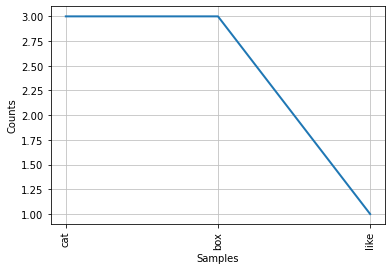

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [30]:
# This file shows simple examples how to calculate bag-of-words.
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
text = '''The cat is in the box.
          The cat likes the box.
          The box is over the cat.'''
# Simple example without any preprocessing.
c = Counter(word_tokenize(text))
c                               # View the counts.
c.values()                      # Only the word count numbers.
c.most_common(2)                # The two most common words.
list(c.elements())              # All the words.
# Convert to lowercase and only keep alphabetic (remove punctuation etc.)
tokens = [w for w in word_tokenize(text.lower()) if w.isalpha()]
# Keep words that are not stopwords (i.e. remove stopwords).
no_stops = [t for t in tokens if t not in stopwords.words('english')]
Counter(no_stops).most_common(2)
# Now we lemmatize the words (similar to stemming).
wnl = WordNetLemmatizer()
lemmatized = [wnl.lemmatize(t) for t in no_stops]
Counter(lemmatized).most_common(2)

# An alternative that is native to NLTK but actually an extension of
# the `Counter` class. Another advantage is that it can plot easily
# using the matplotlib package.
from nltk.probability import FreqDist
fd = FreqDist(lemmatized)
fd                           # Looks like `Counter`.
fd.plot(10)                  # Specify how many words to plot at most.


In [31]:
# This code uses scikit-learn to calculate bag-of-words
# (BOW). `CountVectorizer` implements both tokenization and occurrence
# counting in a single class.
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(stop_words='english') # Vectorizer.
c = [                           # Minimal corpus for illustration.
    'This is the first document.',
    'This is the second document.',
    'And the third one.',
    'Is this the first document?',
]
# Learn the vocabulary dictionary and return the document-term
# matrix. Tokenize and count word occurrences.
bow = v.fit_transform(c)
# Each term found by the analyzer during the fit is assigned a unique
# integer index corresponding to a column in the resulting
# matrix. This interpretation of the columns can be retrieved as
# follows.
bow.toarray()                   # Print the document-term matrix.
bow.A                           # Same effect, shortcut command.
v.get_feature_names()           # Which term is in which column?
# Inverse mapping from feature name to column index.
v.vocabulary_.get('second')
# Mapping of documents to BOW. Words that were not seen in the
# training corpus are ignored.
v.transform(['Something completely new.']).toarray()
v.transform(['A second try.']).toarray()


array([[0, 1]])

In [32]:
# Bag-of-words using gensim.
from gensim.corpora.dictionary import Dictionary
from nltk.tokenize import word_tokenize
# This is an example corpus consisting of movie reviews. You can think
# of each movie review as a separate text document.
cp = \
    ['The movie was about a spaceship and aliens. The movie is wonderful!',
     'I really liked the movie. More people should go see it.',
     'Awesome action scenes, but boring characters.']
# Create tokenized corpus. Very basic preprocessing. Usually you would
# do more work here.
cp = [word_tokenize(doc.lower()) for doc in cp]
cp = [[token for token in doc if token.isalnum() and len(token) > 1]
      for doc in cp]

# Pass to gensim `Dictionary` class. This assigns to each token
# (e.g. word) a unique integer ID. Later on we will just work with
# those IDs instead of the tokens directly because it is
# computationally easier to handle (there is a one-to-one mapping
# between both, so we are not losing any information). The reason why
# we use a dictionary is that it gives us a list of words we are
# interested in examining further. If a word is not in the dictionary
# but occurs in a document, it will be ignored by gensim.
d = Dictionary(cp)
d.token2id  # Like dict(d); show mapping between tokens and their IDs.
d.token2id.get('awesome')       # What's the ID for 'awesome'?
d.get(0)                        # Which token has ID=0?
d.dfs # In how many documents does each token appear? (Document frequency).

# For a single document, we can now calculate the token frequencies
# using the dictionary we just created. "Calculating token
# frequencies" means we're counting words.
d.doc2bow(cp[2])

# Next, using the dictionary we just created, we build a gensim
# corpus, which is just a bag-of-words representation of the original
# corpus. This is a nested list (a list of lists), where each list
# corresponds to a document. Inside each list we have tuples in the
# form
#
# (token_ID, token_frequency).
#
# So all we are really doing here is counting words.
cp = [d.doc2bow(doc) for doc in cp]
# This gensim corpus can now be saved, updated, and reused using tools
# from gensim. The dictionary can also be saved and updaed as well,
# e.g. if we need to add more words later on.

# Print the first three token IDs and their frequency counts from the
# first document.
cp[0][:3]
# For the first document, sort the tokens according to their
# frequency, with the most frequent tokens coming first.
sorted(
    cp[0],                 # First document.
    key = lambda x: x[1],  # Sort by token_frequency (second element).
    reverse = True)        # Most frequent first.


[(4, 2), (6, 2), (0, 1), (1, 1), (2, 1), (3, 1), (5, 1), (7, 1), (8, 1)]

## Latent Semantic Analysis (LSA)

There are many methods out there to achieve dimensionality reduction, one being singular-value decomposition (SVD).


There are a few things to note about SVD. First of all, you can apply the SVD on a term- document matrix containing raw word counts (i.e. BoW) or on a term-document matrix containing weighted word counts, e.g. tf-idf. Second, it is important to realize that SVD is unsupervised, i.e. no human input is necessary for SVD to reduce the dimensionality of the text documents.


The basic idea of SVD is to pick up latent semantic structure, which means that there is some structure about the meaning of words hidden in the word counts that you crystallize with SVD. For this reason, any analysis that you perform after applying the SVD (the SVD is used to extract the latent semantics) is also called latent semantic analysis (LSA) or latent semantic indexing (LSI). In addition to the following para- graphs, we discuss LSA in more detail in Section 19.6 starting on page 150.

## Vector Space Models and Word Embeddings

Another way to transform text to vectors are so-called word embeddings. The idea is to involve a mathematical embedding from a space with one dimension per word (i.e. a very high-dimensional space) to a continuous vector space with much lower dimensionality. The goal is to have a relatively dense representation to avoid issues with sparsity and to have a higher information denseness. Words sharing common contexts should be located in close proximity to another in that space.
A popular example is word2vec, which is an unsupervised model that transforms words based on their co-occurrence into a higher-dimensional vector space. For exam- ple, the vector for “king” minus the vector for “man” plus the vector for “women” should be close to the vector for “queen.” Another popular model is GloVe which is similar to word2vec. For our purposes a more relevant model is doc2vec, which is based on word2vec but works on whole documents instead of words. Another popular way to en- code sentences or short paragraphs is Google’s Universal Sentence Encoder. We dis- cuss word embeddings in more detail in Chapter 19 starting on page 143.